In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree

In [20]:
# Laddar upp datasetet. sep är för att tala om att det är delat med ;
dataSet = pd.read_csv('DataCSV.csv', sep=';', header =1)

In [21]:
# Tar bort alla deciamlkomma som störde ut hela filen
colsToDrop = [col for col in dataSet.columns if 'Unnamed' in col]
dataSet = dataSet.drop(columns=colsToDrop)

In [22]:
# Skriver ut allt å ser så det är bra.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print (dataSet)

      SFH  popUpWidnow  SSLfinal_State  Request_URL  URL_of_Anchor  \
0       1           -1               1           -1             -1   
1      -1           -1              -1           -1             -1   
2       1           -1               0            0             -1   
3       1            0               1           -1             -1   
4      -1           -1               1           -1              0   
5      -1           -1               1           -1             -1   
6       1           -1               0            1             -1   
7       1            0               1            1              0   
8      -1           -1               0           -1             -1   
9      -1            0              -1           -1              1   
10     -1           -1               0           -1             -1   
11      1            0               1            1              1   
12      1           -1               0           -1              1   
13      1           

In [23]:
# Konverterar datan till float för att kunna normalisera
columnsScale = dataSet.columns
dataSet[columnsScale] = dataSet[columnsScale].astype('float64')

In [24]:
# Normaliserar datan med MinMaxScaler. [0,1]
scaler = MinMaxScaler()
dsNormalizedArray = scaler.fit_transform(dataSet[columnsScale])
dataSetNormalized = pd.DataFrame(dsNormalizedArray, columns=columnsScale)

In [25]:
# Skriver ut filen normaliserad. 
print(dataSetNormalized)

      SFH  popUpWidnow  SSLfinal_State  Request_URL  URL_of_Anchor  \
0     1.0          0.0             1.0          0.0            0.0   
1     0.0          0.0             0.0          0.0            0.0   
2     1.0          0.0             0.5          0.5            0.0   
3     1.0          0.5             1.0          0.0            0.0   
4     0.0          0.0             1.0          0.0            0.5   
5     0.0          0.0             1.0          0.0            0.0   
6     1.0          0.0             0.5          1.0            0.0   
7     1.0          0.5             1.0          1.0            0.5   
8     0.0          0.0             0.5          0.0            0.0   
9     0.0          0.5             0.0          0.0            1.0   
10    0.0          0.0             0.5          0.0            0.0   
11    1.0          0.5             1.0          1.0            1.0   
12    1.0          0.0             0.5          0.0            1.0   
13    1.0          0

In [26]:
# Dela upp datan i target(y) och alla futeres(x) som den ska tränas på. 

# *** Orginaldata
targetColumn = 'Resultat'
y = dataSet[targetColumn]
x = dataSet.drop(targetColumn, axis=1)

# *** Normaliserad data
targetColumns = 'Resultat'
yN = dataSetNormalized[targetColumns]
xN = dataSetNormalized.drop(targetColumns, axis=1)


In [27]:
# Skriver ut de olka dataseten
print("Orginaldata:                      dataSet")
print("Normaliserad data:                dataSetNormalized")
print()
print("Target data Orginal:              y")
print("FuturesData Orginal:              x")
print()
print("Target data Normaliserad[0,1]:    yN")
print("FuturesData Normaliserad[0,1]:    xN")

Orginaldata:                      dataSet
Normaliserad data:                dataSetNormalized

Target data Orginal:              y
FuturesData Orginal:              x

Target data Normaliserad[0,1]:    yN
FuturesData Normaliserad[0,1]:    xN


In [28]:
# Nu är det dags att dela upp i träningsdata och testdata

# Vi börjar med 90/10 enligt uppgift.
xTrainData, xTestData, yTrainData, yTestData  = train_test_split(x, y, test_size= 0.1, random_state=None)


In [29]:
# Vi skriver ut hur fördelningen blev med 90/10
print("xTrainData shape: {}\nyTrainData shape: {}".format(xTrainData.shape, yTrainData.shape))
print("xTestData shape: {}\nyTestData shape: {}".format(xTestData.shape, yTestData.shape))

xTrainData shape: (1217, 9)
yTrainData shape: (1217,)
xTestData shape: (136, 9)
yTestData shape: (136,)


In [30]:
# Vi delar upp datan i 70/30
xTrainData, xTestData, yTrainData, yTestData  = train_test_split(x, y, test_size= 0.3, random_state=None)


In [31]:
# Vi skriver ut hur fördelningen blev med 70/30
print("xTrainData shape: {}\nyTrainData shape: {}".format(xTrainData.shape, yTrainData.shape))
print("xTestData shape: {}\nyTestData shape: {}".format(xTestData.shape, yTestData.shape))

xTrainData shape: (947, 9)
yTrainData shape: (947,)
xTestData shape: (406, 9)
yTestData shape: (406,)


In [32]:
# Vi ska nu köra en första testträning
model = DecisionTreeClassifier(random_state=None)
model.fit(xTrainData,yTrainData)
predictions = model.predict(xTestData)

In [ ]:
# Kolla performance

# Börjar med confusion matrix - Detta behöver jag tydliggöra
print(confusion_matrix(yTestData, predictions))
print()
print(classification_report(yTestData, predictions))



[[197   1  11]
 [  3  21   4]
 [ 26   7 136]]

              precision    recall  f1-score   support

        -1.0       0.87      0.94      0.91       209
         0.0       0.72      0.75      0.74        28
         1.0       0.90      0.80      0.85       169

    accuracy                           0.87       406
   macro avg       0.83      0.83      0.83       406
weighted avg       0.87      0.87      0.87       406



[Text(0.47161627435064934, 0.9642857142857143, 'x[0] <= 0.5\ngini = 0.563\nsamples = 947\nvalue = [493.0, 75.0, 379.0]'),
 Text(0.14371956168831168, 0.8928571428571429, 'x[2] <= -0.5\ngini = 0.345\nsamples = 407\nvalue = [41, 42, 324]'),
 Text(0.3076679180194805, 0.9285714285714286, 'True  '),
 Text(0.032467532467532464, 0.8214285714285714, 'x[1] <= 0.5\ngini = 0.047\nsamples = 167\nvalue = [3, 1, 163]'),
 Text(0.025974025974025976, 0.75, 'x[3] <= 0.5\ngini = 0.036\nsamples = 166\nvalue = [2, 1, 163]'),
 Text(0.012987012987012988, 0.6785714285714286, 'x[8] <= 0.5\ngini = 0.013\nsamples = 158\nvalue = [0, 1, 157]'),
 Text(0.006493506493506494, 0.6071428571428571, 'gini = 0.0\nsamples = 144\nvalue = [0, 0, 144]'),
 Text(0.01948051948051948, 0.6071428571428571, 'x[3] <= -0.5\ngini = 0.133\nsamples = 14\nvalue = [0, 1, 13]'),
 Text(0.012987012987012988, 0.5357142857142857, 'x[5] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.006493506493506494, 0.4642857142857143, 'gini = 

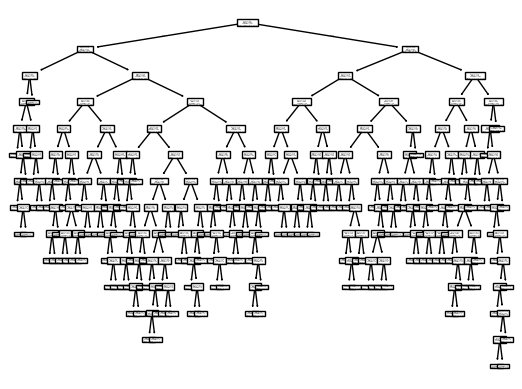

In [35]:
# Visa träd
tree.plot_tree(model)